This file was made to format the tables written to MSTimings.txt and HierarchicalTimings.txt by cmtTimeAnalysis.ipynb into arrays and plot graphs from the correctly formatted arrays.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
msTimingsF = open("timings/MSTimings.txt")
hTimingsF = open("timings/HierarchicalTimings.txt")

In [3]:
headerMS = msTimingsF.readline().rstrip("\n").split(",")
headerH = hTimingsF.readline().rstrip("\n").split(",")

projectsMS = []
projectsH = []
xMS = [0] + [float(headerMS[i].split(" ")[0]) for i in range(2, len(headerMS), 2)]
xH = [1] + list(reversed([float(headerH[i].split(" ")[0]) for i in range(2, len(headerH), 2)]))
yMS = []
yH = []
stdMS = []
stdH = []
for line in msTimingsF:
    line = line.rstrip("\n").split(",")
    projectsMS.append(line[0])
    yMS.append([float(line[1])] + [float(line[i].split(" ")[0]) for i in range(2, len(line), 2)])
    stdMS.append([0] + [float(line[i].split(" ")[0]) for i in range(3, len(line), 2)])
for line in hTimingsF:
    line = line.rstrip("\n").split(",")
    projectsH.append(line[0])
    yH.append(list(reversed([float(line[i].split(" ")[0]) for i in range(2, len(line), 2)] + [float(line[1])])))
    stdH.append(list(reversed([float(line[i].split(" ")[0]) for i in range(3, len(line), 2)] + [0])))

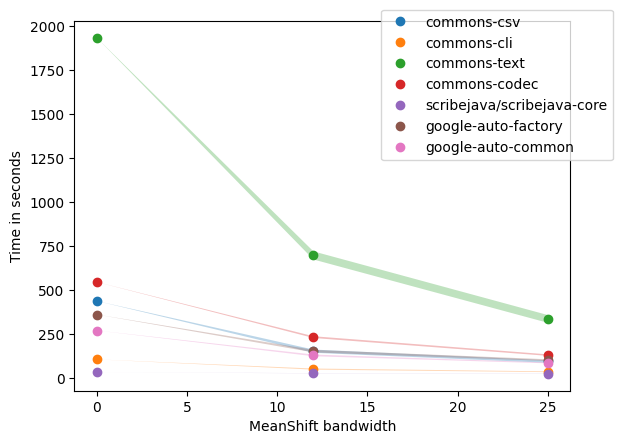

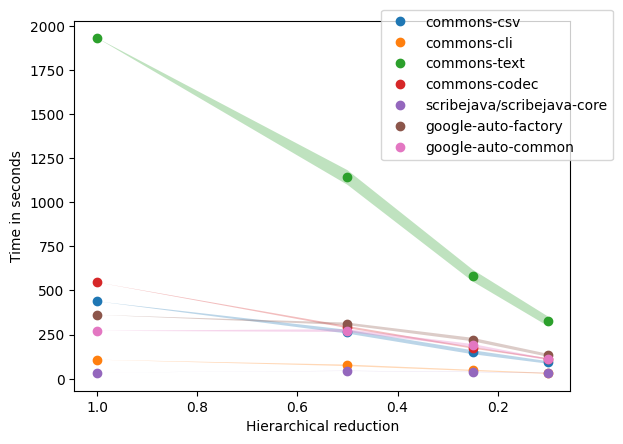

In [4]:
for i, project in enumerate(projectsMS):
    plt.plot(xMS, yMS[i], "o", label=project)
    plt.fill_between(xMS, np.asarray(yMS[i])-np.asarray(stdMS[i]), np.asarray(yMS[i])+np.asarray(stdMS[i]), alpha=.3)
plt.xlabel("MeanShift bandwidth")
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig("graphs/meanShiftTime.png")
plt.show()
for i, project in enumerate(projectsH):
    plt.plot(xH, yH[i], "o", label=project)
    plt.fill_between(xH, np.asarray(yH[i])-np.asarray(stdH[i]), np.asarray(yH[i])+np.asarray(stdH[i]), alpha=.3)
plt.xlabel("Hierarchical reduction")
plt.gca().invert_xaxis()
plt.ylabel("Time in seconds")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.savefig("graphs/hierarchicalTime.png")
plt.show()